<a href="https://colab.research.google.com/github/aman3002/fraud-credit-card-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
a=pd.read_csv("/content/drive/MyDrive/credit card dataset/creditcard.csv")
print(a)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [51]:
#describing the dataset
z=(list(a.columns))
print(a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [52]:
print(a.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [53]:
#dropping the null values
a=a.dropna()

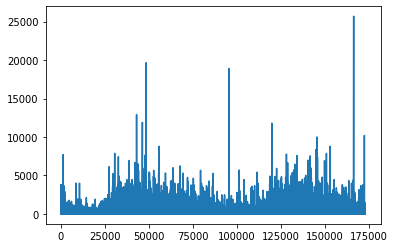

In [54]:
plt.plot(a["Time"],a["Amount"])
plt.show()

In [55]:
#due to inappropiate scaling we have to rescale the values
scaler=MinMaxScaler()
s=scaler.fit_transform(a.iloc[:,:-1])
print(s)

[[0.00000000e+00 9.35192337e-01 7.66490419e-01 ... 4.18976135e-01
  3.12696634e-01 5.82379309e-03]
 [0.00000000e+00 9.78541955e-01 7.70066651e-01 ... 4.16345145e-01
  3.13422663e-01 1.04705276e-04]
 [5.78730497e-06 9.35217023e-01 7.53117667e-01 ... 4.15489266e-01
  3.11911316e-01 1.47389219e-02]
 ...
 [9.99976851e-01 9.90904812e-01 7.64079694e-01 ... 4.16593177e-01
  3.12584864e-01 2.64215395e-03]
 [9.99976851e-01 9.54208999e-01 7.72855742e-01 ... 4.18519535e-01
  3.15245157e-01 3.89238944e-04]
 [1.00000000e+00 9.49231759e-01 7.65256401e-01 ... 4.16466371e-01
  3.13400843e-01 8.44648509e-03]]


In [60]:
x=pd.DataFrame(s,columns=z[:-1])
t=a["Class"].values
t=pd.DataFrame(t,columns=["Class"])
x=pd.concat([x,t],axis=1)
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
0       0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1       0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2       0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3       0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4       0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.999965  0.756448  0.873531  0.666991  0.160317  0.729603  0.236810   
284803  0.999971  0.945845  0.766677  0.872678  0.219189  0.771561  0.273661   
284804  0.999977  0.990905  0.764080  0.781102  0.227202  0.783425  0.293496   
284805  0.999977  0.954209  0.772856  0.849587  0.282508  0.763172  0.269291   
284806  1.000000  0.949232  0.765256  0.849601  0.229488  0.765632  0.256488   

              V7        V8        V9  .

            Time        V1        V2        V3        V4        V5        V6  \
0      -1.995605 -0.669989 -0.032134  1.605555  0.951892 -0.213575  0.332804   
1      -1.995605  0.632056  0.170669  0.029762  0.294394  0.075893 -0.078437   
2      -1.995581 -0.669248 -0.790483  1.098123  0.246054 -0.333390  1.342970   
3      -1.995581 -0.469179 -0.099416  1.111277 -0.632779  0.024787  0.925276   
4      -1.995557 -0.567131  0.536617  0.948852  0.262495 -0.263624  0.056151   
...          ...       ...       ...       ...       ...       ...       ...   
243619  1.635192 -0.501975  0.285813  0.339477 -0.559369 -0.697463  0.002924   
243620  1.635192  0.833620 -1.427166 -1.251868 -1.068392 -0.814917 -0.324286   
243621  1.635216  1.105706 -0.287891 -1.173625 -0.278008  0.062984 -0.550226   
243622  1.635216  1.050979 -0.059642 -1.171659  0.214802  0.266982 -0.667788   
243623  1.635216  1.066078 -0.011986 -0.785686  0.275214 -0.044011 -0.923068   

              V7        V8        V9  .

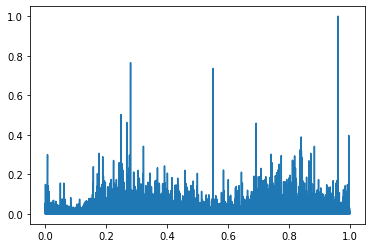

In [61]:
plt.plot(x["Time"],x["Amount"])

In [62]:
print(a["Class"].unique())

[0 1]


<Axes: xlabel='Class', ylabel='count'>

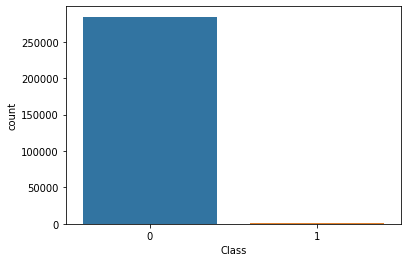

In [63]:
import seaborn as sns
sns.countplot(x="Class",data=a)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
w=x.iloc[:,:-1]
e=x.iloc[:,-1]
xtrain,xtest,ytrain,ytest=train_test_split(w,e,test_size=0.2,random_state=0)
model1=RandomForestClassifier()
model2=DecisionTreeClassifier()
model1.fit(xtrain,ytrain)
model2.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [66]:
q=model1.predict(xtest)
p=model2.predict(xtest)
i=model1.score(w,e)
o=model2.score(w,e)
print("model 1 score",i)
print("model 2 score",o)

model 1 score 0.9999016878096395
model 2 score 0.9998455094151478


Random forest classifier works better than the decision tree classifier for the fraud credit card detection.

In [71]:
print(model1.predict(np.array(x.iloc[-1,:-1]).reshape(1,-1)))

[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


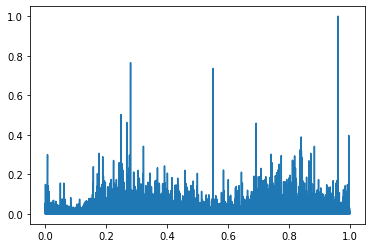

In [72]:
plt.plot(x["Time"],x["Amount"])

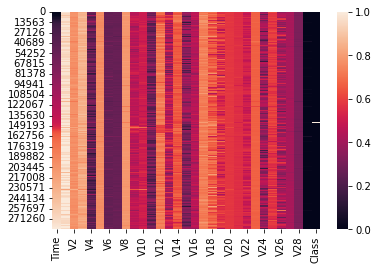

In [78]:
sns.heatmap(x)
plt.show()